In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('social_media_cleaned.csv')
df.head()

,content_length,follower_count,ER,hour,description_score,hashtag_count,desciption_word_count,day_sin,day_cos,content_type_mixed,content_type_text,content_type_video
0,77,738090,1.627037,4,-0.125000,4,9,0.0,1.0,0,0,1
1,43,477195,2.544662,7,0.018519,1,19,0.0,1.0,0,0,0
2,169,206546,5.849060,9,0.400000,5,22,0.0,1.0,0,0,1
3,484,738764,1.638818,11,-0.049285,2,26,0.0,1.0,0,0,1
4,555,97299,12.754499,12,-0.106250,1,26,0.0,1.0,0,0,1


In [ ]:
X = df.drop(columns=['ER'])
y = df['ER'].apply(np.log1p)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.head()

,ER
0,1.627037
1,2.544662
2,5.849060
3,1.638818
4,12.754499


In [ ]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Score R2 Final : {r2_score(y_test, y_pred):.4f}")
print(f"RMSE Final : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Score R2 Final : 0.9984
RMSE Final : 0.1928


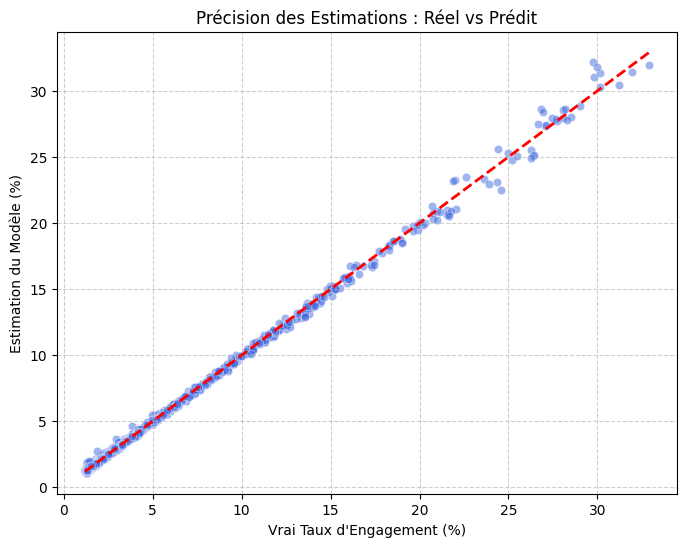

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Précision des Estimations : Réel vs Prédit")
plt.xlabel("Vrai Taux d'Engagement (%)")
plt.ylabel("Estimation du Modèle (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import joblib as jb
jb.dump(model, 'model.pkl')

['model.pkl']

<Figure size 1000x800 with 0 Axes>

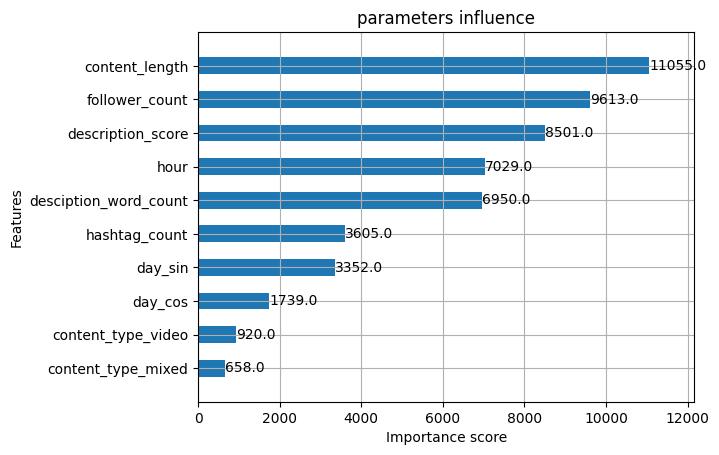

In [ ]:
plt.figure(figsize=(10, 8))

xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("parameters influence")
plt.savefig('params.png',dpi=300, bbox_inches='tight')
plt.show()